# recap

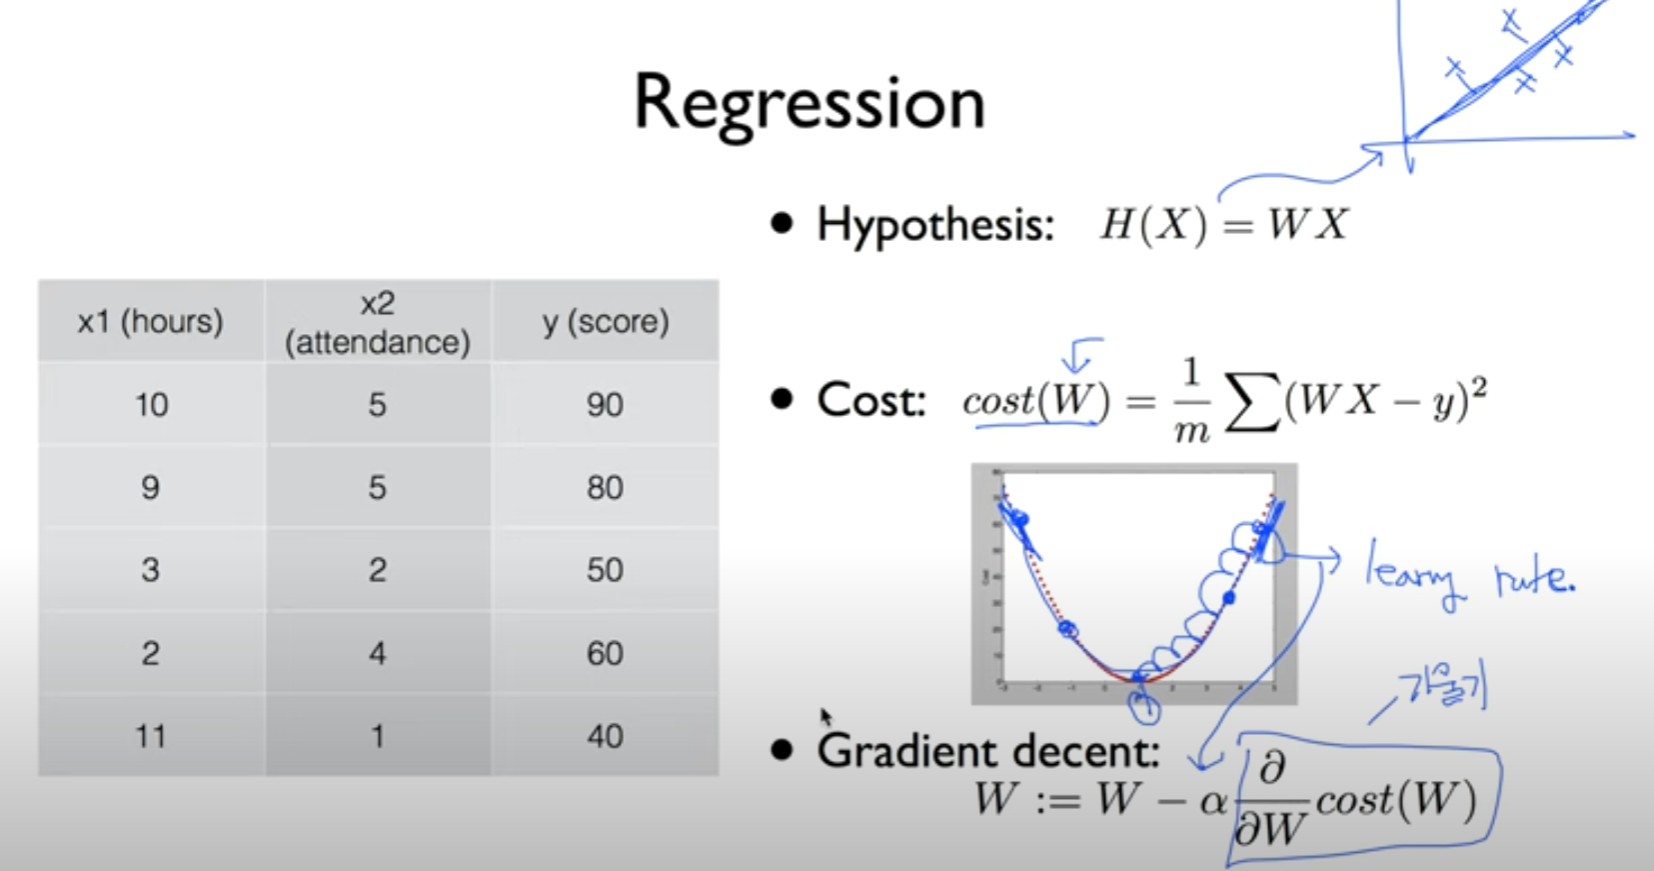

cost를 최소화하는 weight를 찾아내자.

어떤 점에서 시작할때, 그 지점에서 기울기를 본다음, 한 발짝씩 움직이는 것. 하산과 같은 이치 

기울기라는 것은 COST 함수를 미분한 것.

한번에 얼마나 움직일까? alpha로 주어진 것. Learning rate 

# classification
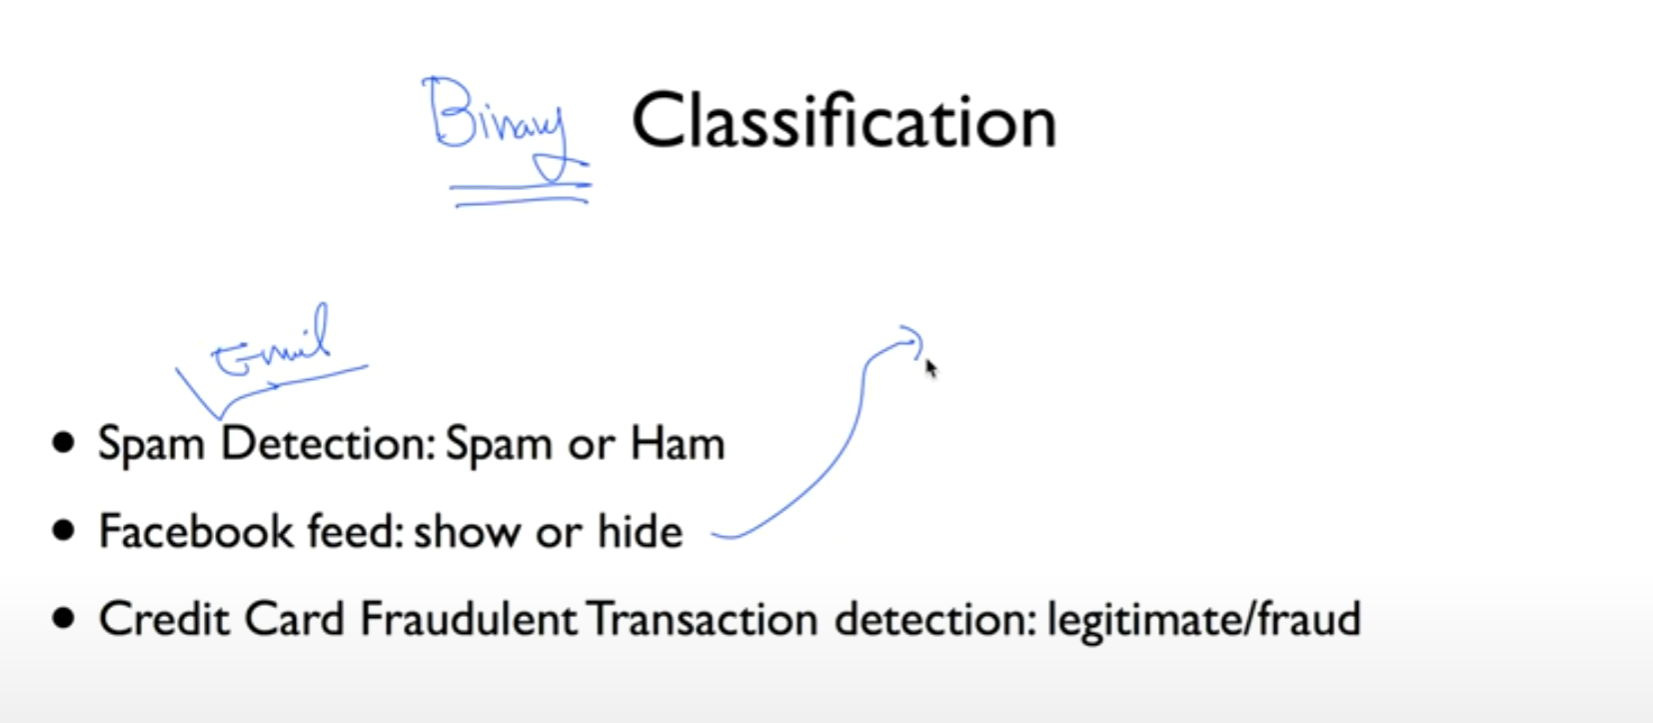

0과 1로 인코딩

# Logistic Regression / Sigmoid

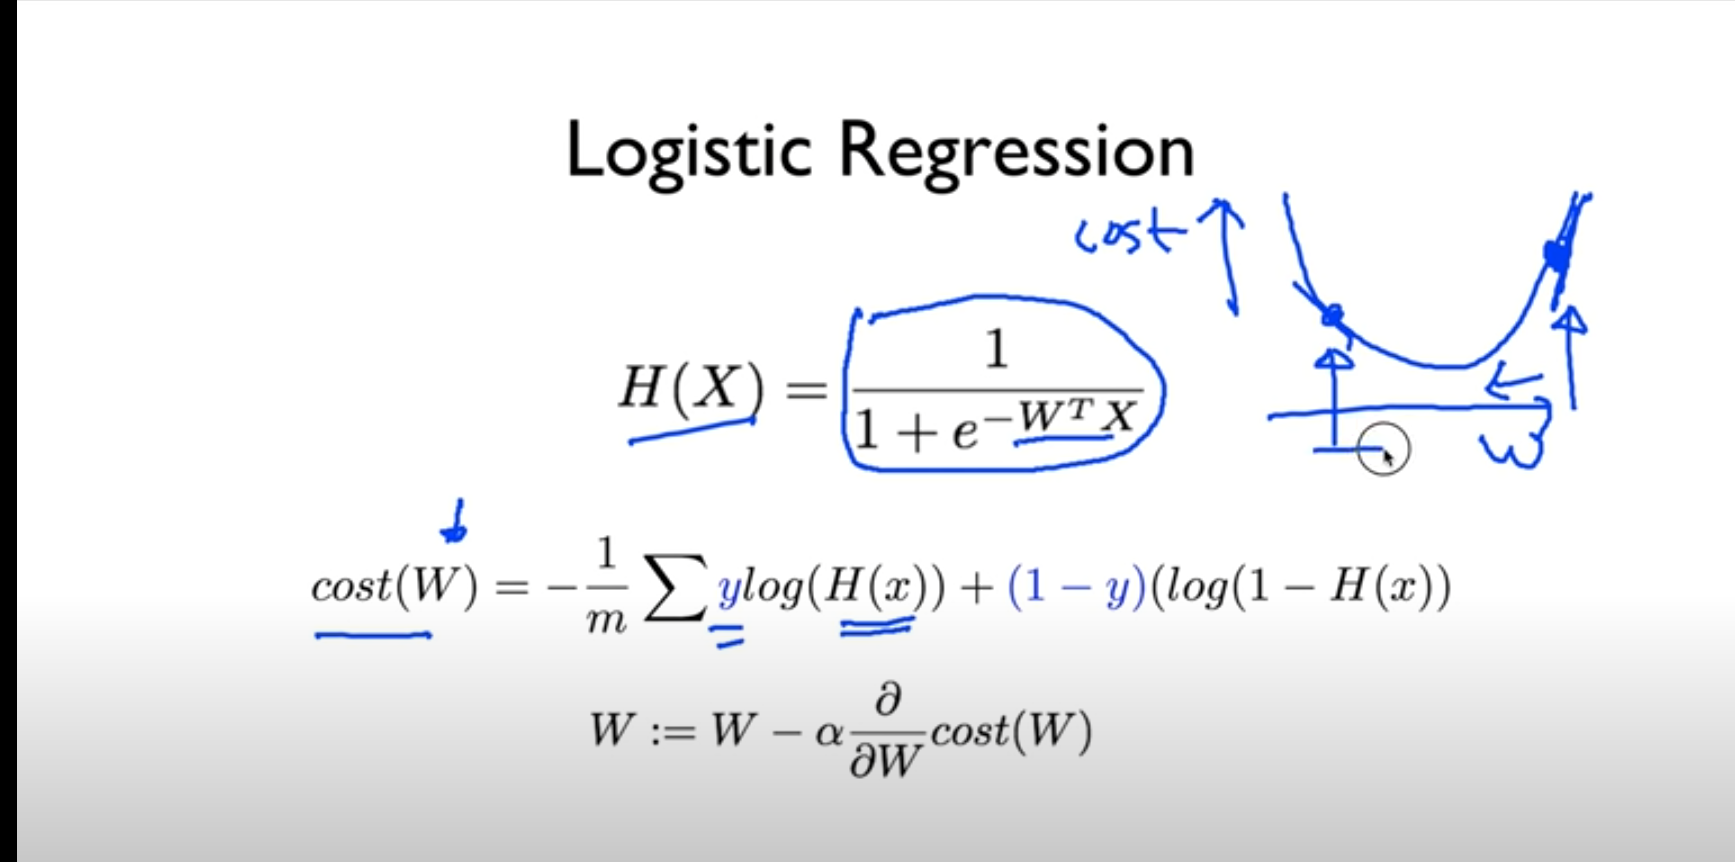

https://m.blog.naver.com/ljh0326s/221229607491
잘 정리된 블로그가 있어 앞으로는 이것을 활용

In [2]:
#강의 버전 맞추기
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]] #Binary 0 : fail, 1 : success

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#Sigmoid
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

# 경사하강진행, 직접 미분 필요 없\다~~
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) #0과 1로 변환해줌 
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 1.3996862
200 0.4883226
400 0.47039
600 0.45363247
800 0.43783483
1000 0.4228743
1200 0.4086735
1400 0.3951787
1600 0.38234803
1800 0.3701459
2000 0.3585401
2200 0.34750032
2400 0.3369976
2600 0.3270041
2800 0.31749275
3000 0.30843762
3200 0.29981378
3400 0.29159743
3600 0.28376576
3800 0.27629715
4000 0.2691712
4200 0.26236832
4400 0.25587034
4600 0.24965994
4800 0.24372083
5000 0.23803787
5200 0.23259658
5400 0.22738355
5600 0.2223862
5800 0.21759254
6000 0.21299158
6200 0.20857291
6400 0.20432681
6600 0.200244
6800 0.19631596
7000 0.19253473
7200 0.18889265
7400 0.18538262
7600 0.18199807
7800 0.17873277
8000 0.17558078
8200 0.17253655
8400 0.16959499
8600 0.16675115
8800 0.16400053
9000 0.1613387
9200 0.15876168
9400 0.15626547
9600 0.1538466
9800 0.15150163
10000 0.14922725

Hypothesis:  [[0.03062722]
 [0.15869221]
 [0.30432898]
 [0.78162885]
 [0.9397307 ]
 [0.9802214 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


In [4]:
# 당뇨 데이터에 적용

In [7]:
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

(759, 8) (759, 1)
0 1.4752487
200 0.78768563
400 0.6703325
600 0.64183885
800 0.626083
1000 0.6132852
1200 0.6019338
1400 0.59169835
1600 0.58243656
1800 0.574044
2000 0.5664292
2200 0.5595111
2400 0.55321705
2600 0.5474819
2800 0.5422479
3000 0.5374638
3200 0.53308356
3400 0.52906734
3600 0.5253787
3800 0.5219858
4000 0.5188604
4200 0.51597697
4400 0.5133133
4600 0.5108491
4800 0.50856644
5000 0.5064492
5200 0.504483
5400 0.50265497
5600 0.5009534
5800 0.49936774
6000 0.49788857
6200 0.4965074
6400 0.49521622
6600 0.49400833
6800 0.492877
7000 0.49181667
7200 0.49082193
7400 0.48988807
7600 0.48901042
7800 0.48818508
8000 0.48740858
8200 0.48667717
8400 0.48598775
8600 0.48533776
8800 0.48472425
9000 0.4841449
9200 0.48359752
9400 0.48307994
9600 0.48259026
9800 0.4821268
10000 0.48168775

Hypothesis:  [[0.41975483]
 [0.92270696]
 [0.24328601]
 [0.93831223]
 [0.16843128]
 [0.74863327]
 [0.9288281 ]
 [0.55765647]
 [0.2600662 ]
 [0.5202701 ]
 [0.6854048 ]
 [0.17488027]
 [0.2677865 ]
 [0